In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest, uniform
from scipy.special import kolmogi
from math import sqrt

In [38]:
data = list(pd.read_csv("data/Грищенко_Александр_Михайлович.csv").data)
sortedData = np.array(sorted(data))

In [39]:
n = len(data)
uniform_distrib = [uniform.cdf(x/n) for x in range(n)]

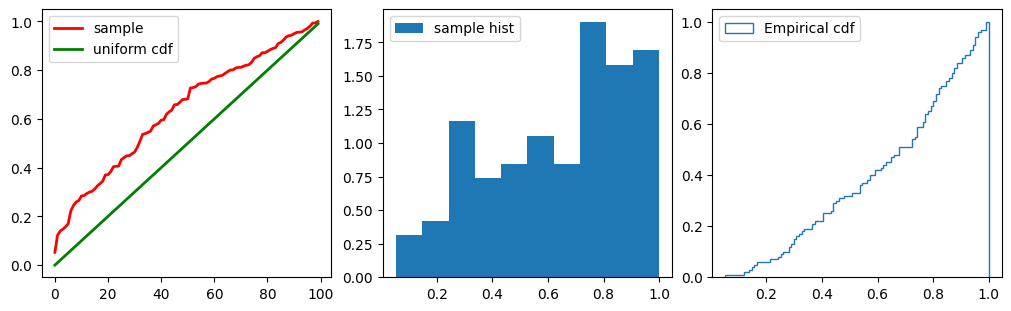

In [40]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3), constrained_layout = True)
ax1.plot(sortedData, 'r-', lw=2, label='sample')
ax1.plot(uniform_distrib, 'g-', lw=2, label='uniform cdf')
ax1.legend(loc='best')
ax2.hist(sortedData, density=True, bins=10, label='sample hist')
ax2.legend(loc='best')
ax3.hist(sortedData, histtype='step', density=True, cumulative=True, bins=len(sortedData), label='Empirical cdf')
ax3.legend(loc='upper left')
plt.show()
# Последнюю гистограмму следует рассматривать как график со стрелками

Критерий Колмогова

In [41]:
statistic_kolm, pvalue_kolm = kstest(sortedData, 'uniform')
statistic_kolm = statistic_kolm * sqrt(n) # умножить на sqrt(n) для больших n
statistic_kolm, pvalue_kolm = round(statistic_kolm, 3), round(pvalue_kolm, 5)

In [42]:
significance_level = sorted([0.1, 0.01, 0.001, pvalue_kolm], reverse=True)
kolm_crit = kolmogi(significance_level) # обратная функция Колмогорова
print(f"Статистика {statistic_kolm}, p-value {pvalue_kolm}")
print("Уровень значимости\t\tКритическая область\t\tВывод")
for i in range(len(significance_level)):
    kolm_crit[i] = round(kolm_crit[i], 3)
    # Критическая область правосторонняя [u_кр; inf)
    print(f"{significance_level[i]}:\t\t\t\t\t[{kolm_crit[i]}; inf)", end='\t\t\t')
    if statistic_kolm >= kolm_crit[i]:
        print("Отвергается гипотеза")
    else:
        print("Принимается гипотеза")

Статистика 2.169, p-value 0.00013
Уровень значимости		Критическая область		Вывод
0.1:					[1.224; inf)			Отвергается гипотеза
0.01:					[1.628; inf)			Отвергается гипотеза
0.001:					[1.949; inf)			Отвергается гипотеза
0.00013:					[2.196; inf)			Принимается гипотеза


Критерий Пирсона

In [43]:
sample_data, _ = np.histogram(sortedData, 10, (0, 1))
uniform_hist = [10 for x in range(10)]
statistic_pirson, pvalue_pirson = stats.chisquare(sample_data, uniform_hist)
statistic_pirson, pvalue_pirson = round(statistic_pirson, 3), round(pvalue_pirson, 3)

In [44]:
significance_level = sorted([0.1, 0.01, 0.001, pvalue_pirson], reverse=True)
# ppf - Percent point function (обратная функция хи квадрат).
k = 10 - 1 # степень свободы
print(f"Статистика {statistic_pirson}, p-value {pvalue_pirson}")
print("Уровень значимости\tКритическая область\t\tВывод")
for i in range(len(significance_level)):
    chi2_crit = chi2.ppf(1 - significance_level[i], k) # (1 - epsilon)
    chi2_crit = round(chi2_crit, 3)
     # Критическая область правосторонняя [chi2_crit; inf)
    print(f"{significance_level[i]}:\t\t\t\t[{chi2_crit}; inf)", end='\t\t\t')
    if statistic_pirson >= chi2_crit:
        print("Отвергается гипотеза")
    else:
        print("Принимается гипотеза")

Статистика 24.0, p-value 0.004
Уровень значимости	Критическая область		Вывод
0.1:				[14.684; inf)			Отвергается гипотеза
0.01:				[21.666; inf)			Отвергается гипотеза
0.004:				[24.197; inf)			Принимается гипотеза
0.001:				[27.877; inf)			Принимается гипотеза
